In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import BaseEstimator, TransformerMixin
import scipy 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Gender_sumission
gender_submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Trying to Know the NULL VALUES

In [6]:
train_data.shape[0]

891

In [7]:
#NAN variables and Their Percantages
train_data.isna().sum()/train_data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# The only feature has to be imputed seems to be AGE
# We can Drop out Cabin and Embarked as they do not look like to contribute to results . 
x_train=train_data[["Pclass","Sex","Age","SibSp","Parch"]]
y_train=train_data["Survived"]

In [9]:
x_test=test_data[["Pclass","Sex","Age","SibSp","Parch"]]


# 

In [10]:
print(train_data["Sex"].value_counts()/train_data.shape[0])
print(train_data["SibSp"].value_counts()/train_data.shape[0])
print(train_data["Parch"].value_counts()/train_data.shape[0])
print(train_data["Ticket"].value_counts()/train_data.shape[0])
print(train_data["Fare"].value_counts()/train_data.shape[0])
print(train_data["Cabin"].value_counts()/train_data.shape[0])
print(train_data["Embarked"].value_counts()/train_data.shape[0])
print(train_data["Pclass"].value_counts()/train_data.shape[0])

Sex
male      0.647587
female    0.352413
Name: count, dtype: float64
SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: count, dtype: float64
Parch
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: count, dtype: float64
Ticket
347082      0.007856
CA. 2343    0.007856
1601        0.007856
3101295     0.006734
CA 2144     0.006734
              ...   
9234        0.001122
19988       0.001122
2693        0.001122
PC 17612    0.001122
370376      0.001122
Name: count, Length: 681, dtype: float64
Fare
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: count, Length: 248, dtype: float64
Cabin
B96 B98        0.004489
G6             0.004489
C23 C25 C27    0.004489
C22 C26        0.003367
F33            0.00

In [11]:
# what to do with imputed data 
# scale data 
# remove outliers 


## The Possible Models and their features toward Outliers and Missing Values

In [12]:
## Naive Bayes 
    # Outlier removal 
    # Encoding 
## SVM & Logistic regression Logistic Regression
    # Remove Outliers 
    # Remove missing values 
    # Scaling 
    # dummy variables 
## Trees (Decision, RF, XGBoost, GB Tree)
## KNN
    # Feature scaling
    # Imputation 
    # dummy variables 
## ANN 
    # scaling 
    # get dummies 

In [13]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# NAIVE_BAYES

In [14]:
## Naive Bayes 
    # Outlier removal 
    # Encoding 
# The only factor needs to be imputed is the age
# The only factor needs to be encoded is the Sex

# Imputing

imp=SimpleImputer(strategy="median")    
train_data["imp_age"]=imp.fit_transform(train_data[["Age"]])
test_data["imp_age"]=imp.fit_transform(test_data[["Age"]])

#Encoding

enc=LabelEncoder()
train_data["sex_enc"]=enc.fit_transform(train_data[["Sex"]])
test_data["sex_enc"]=enc.fit_transform(test_data[["Sex"]])
#Defining X_train,Y_train
x_train_nb= train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_nb=train_data["Survived"]


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_scores = cross_val_score(nb_model, x_train_nb, y_train_nb, cv=5)
print(nb_scores)


nb_model.fit(x_train_nb, y_train_nb)


[0.73184358 0.73595506 0.78651685 0.7752809  0.80898876]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

              precision    recall  f1-score   support

        Died       0.98      0.87      0.92       266
    Survived       0.81      0.97      0.88       152

    accuracy                           0.90       418
   macro avg       0.89      0.92      0.90       418
weighted avg       0.92      0.90      0.91       418



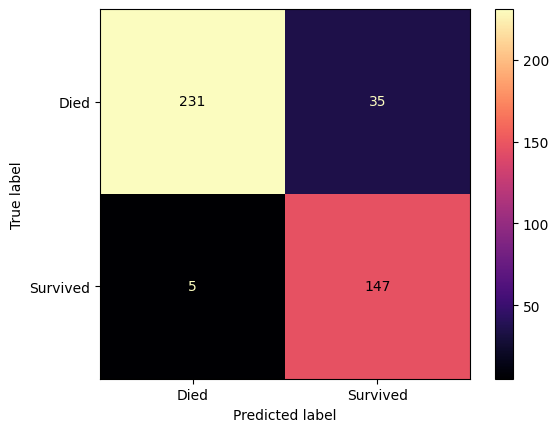

In [15]:
x_test_nb= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_nb=gender_submission["Survived"]
y_pred_nb= nb_model.predict(x_test_nb)
labels=["Died","Survived"]
ConfusionMatrixDisplay.from_predictions(y_test_nb,y_pred_nb,display_labels=labels,cmap="magma")
print(classification_report(y_test_nb,y_pred_nb,target_names=["Died","Survived"]))

# SVM

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best kernel value: rbf
Best C value: 1
Best gamma value: scale
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418




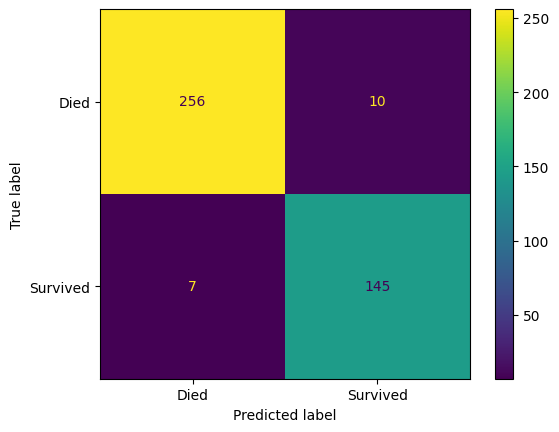

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

x_train_svm= train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_svm=train_data["Survived"]

x_test_svm= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_svm=gender_submission["Survived"]

# Scaling
scale=StandardScaler()
x_train_svm_scaled=scale.fit_transform(x_train_svm)
x_test_svm_scale=scale.fit_transform(x_test_svm)

#Model
model_svm=SVC()


param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search_svm = GridSearchCV(model_svm, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(x_train_svm_scaled,y_train_svm)
test_score_svm = grid_search_svm.best_estimator_.score(x_train_svm_scaled, y_train_svm)

print(f"Best kernel value: {grid_search_svm.best_params_['kernel']}")
print(f"Best C value: {grid_search_svm.best_params_['C']}")
print(f"Best gamma value: {grid_search_svm.best_params_['gamma']}")
y_true, y_pred_svm = y_test_svm, grid_search_svm.predict(x_test_svm_scale)
print(classification_report(y_true, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_svm,display_labels=["Died","Survived"])
print()


# Logistic Regression


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best penalty value: l2
Best C value: 0.1
Best solver value: newton-cg
Best max_iter value: 100
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       266
           1       0.92      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418




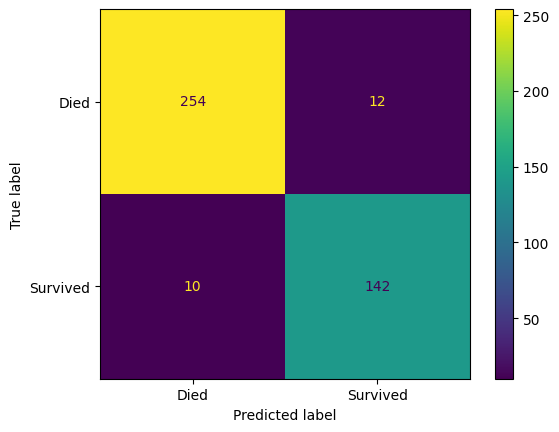

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV

x_train_log= train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_log=train_data["Survived"]

x_test_log= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_log=gender_submission["Survived"]

# Scaling
scale=StandardScaler()
x_train_log_scaled=scale.fit_transform(x_train_log)
x_test_log_scaled=scale.fit_transform(x_test_log)

#Model
model_log=LogisticRegression()

#Hyperparmeter Tuning : Grid Search

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search_log = GridSearchCV(model_log, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_log.fit(x_train_log_scaled,y_train_log)
test_score_log = grid_search_log.best_estimator_.score(x_train_log_scaled, y_train_log)

print(f"Best penalty value: {grid_search_log.best_params_['penalty']}")
print(f"Best C value: {grid_search_log.best_params_['C']}")
print(f"Best solver value: {grid_search_log.best_params_['solver']}")
print(f"Best max_iter value: {grid_search_log.best_params_['max_iter']}")
y_true, y_pred_log = y_test_log, grid_search_log.predict(x_test_log_scaled)
print(classification_report(y_true, y_pred_log))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_log,display_labels=["Died","Survived"])
print()



# Decision Tree


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       266
           1       0.90      0.82      0.86       152

    accuracy                           0.90       418
   macro avg       0.90      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418




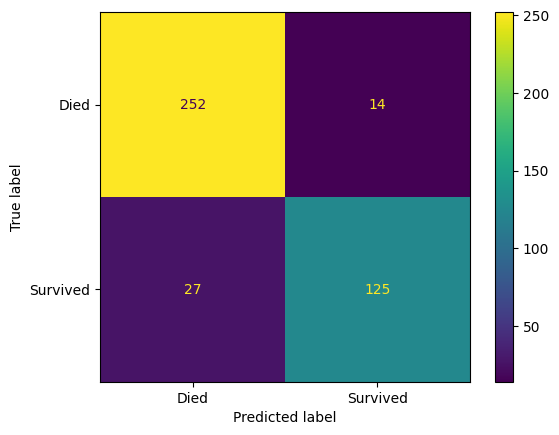

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

x_train_dt= train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_dt=train_data["Survived"]

x_test_dt= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_dt=gender_submission["Survived"]





model_dt = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=30,min_samples_split=10,min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.0,max_features="log2",max_leaf_nodes=40,min_impurity_decrease=0.0,
                                 class_weight=None)
result_dt=model_dt.fit(x_train_dt,y_train_dt)


""""param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': [None, 'balanced']
}

grid_search_dt = GridSearchCV(model_dt, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_dt,y_train_dt)
test_score_dt = grid_search_dt.best_estimator_.score(x_train_dt, y_train_dt)

print(f"Best criterion: {grid_search_dt.best_params_['criterion']}")
print(f"Best splitter: {grid_search_dt.best_params_['splitter']}")
print(f"Best max_depth: {grid_search_dt.best_params_['max_depth']}")
print(f"Best min_samples_split: {grid_search_dt.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {grid_search_dt.best_params_['min_samples_leaf']}")
print(f"Best min_samples_leaf: {grid_search_dt.best_params_['min_samples_leaf']}")
print(f"Best min_weight_fraction_leaf: {grid_search_dt.best_params_['min_weight_fraction_leaf']}")
print(f"Best max_features: {grid_search_dt.best_params_['max_features']}")
print(f"Best max_leaf_nodes: {grid_search_dt.best_params_['max_leaf_nodes']}")
print(f"Best min_impurity_decrease: {grid_search_dt.best_params_['min_impurity_decrease']}")
print(f"Best class_weight: {grid_search_dt.best_params_['class_weight']}")"""


y_true, y_pred_dt = y_test_dt, result_dt.predict(x_test_dt)
print(classification_report(y_true, y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_dt,display_labels=["Died","Survived"])
print()




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418




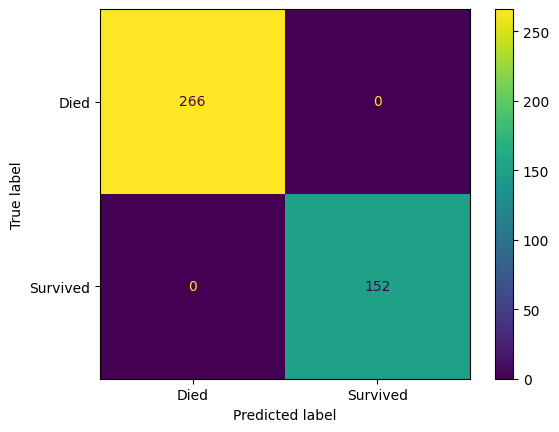

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV




x_train_rf = train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_rf= train_data["Survived"]

x_test_rf= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_rf= gender_submission["Survived"]


# Random Forest with default parameters
model_rf = RandomForestClassifier(n_estimators=200,criterion="entropy",class_weight="balanced",min_samples_leaf=10,
                                  min_samples_split=5,min_weight_fraction_leaf=0.2,max_features="sqrt",max_depth=15,
                                 min_impurity_decrease=0.2,max_leaf_nodes=10,bootstrap=True,oob_score=True,warm_start=False)

result_rf=model_rf.fit(x_train_rf,y_train_rf)

"""param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'warm_start': [False, True],
    'oob_score': [False, True]
}

grid_search_rf = RandomizedSearchCV(model_rf, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train_rf, y_train_rf)
test_score_rf = grid_search_rf.best_estimator_.score(x_train_rf, y_train_rf)

print("Best hyperparameters found:")
for key, value in grid_search_rf.best_params_.items():
    print(f"{key}: {value}")"""



y_true, y_pred_rf = y_test_rf, result_rf.predict(x_test_rf)
print(classification_report(y_true, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_rf,display_labels=["Died","Survived"])
print()

# GRADIENT BOOSTING

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       266
           1       0.88      0.79      0.83       152

    accuracy                           0.89       418
   macro avg       0.88      0.86      0.87       418
weighted avg       0.89      0.89      0.88       418




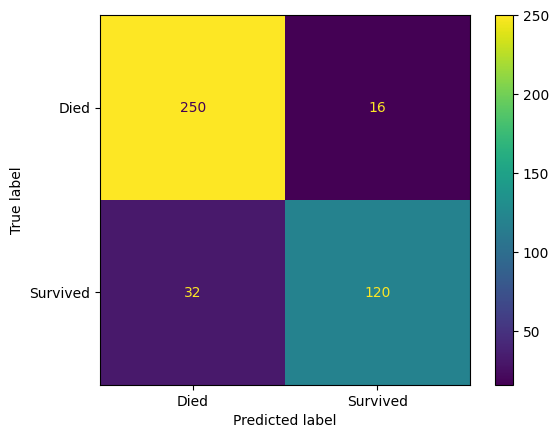

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV


x_train_gb = train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_gb= train_data["Survived"]

x_test_gb= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_gb= gender_submission["Survived"]


# Gradient Boosting with default parameters
model_gb = GradientBoostingClassifier(validation_fraction=0.1,tol=0.0001,subsample=0.5,n_iter_no_change=5,
                                     n_estimators=50,min_weight_fraction_leaf=0.0,min_samples_split=2,
                                     min_samples_leaf=4,min_impurity_decrease=0.2,max_leaf_nodes=None,max_features="log2",
                                     max_depth=10,loss="exponential",learning_rate=0.1,criterion="friedman_mse")

result_gb=model_gb.fit(x_train_gb,y_train_gb)

# Expanded parameter grid for GridSearchCV
"""param_grid = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [10, 50, 100, 200, 300],
    'subsample': [0.5, 0.8, 1.0],
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'n_iter_no_change': [None, 5, 10, 15],
    'validation_fraction': [0.1, 0.2, 0.3, 0.4, 0.5],
    'tol': [1e-4, 1e-3, 1e-2, 1e-1]
}"""

"""rand_search_gb = RandomizedSearchCV(model_gb, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rand_search_gb.fit(x_train_gb, y_train_gb)
test_score_gb = grid_search_gb.best_estimator_.score(x_train_gb, y_train_gb)"""

"""print("Best hyperparameters found:")
for key, value in grid_search_gb.best_params_.items():
    print(f"{key}: {value}")"""

"""print(f"Best accuracy: {grid_search_gb.best_score_}")"""


y_true, y_pred_gb = y_test_gb, result_gb.predict(x_test_gb)
print(classification_report(y_true, y_pred_gb))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_gb,display_labels=["Died","Survived"])
print()


# XGBOOST

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarnin

[0.82122905 0.81460674 0.80898876 0.82022472 0.83707865]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters found:
subsample: 1.0
scale_pos_weight: 1
reg_lambda: 2
reg_alpha: 0.4
random_state: 3
n_estimators: 300
min_child_weight: 10
max_depth: 3
max_delta_step: 1
learning_rate: 0.2
gamma: 0.4
colsample_bytree: 0.8
colsample_bylevel: 1.0
booster: gbtree
base_score: 0.6
Best accuracy: 0.8260247316552632
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       266
           1       0.87      0.86      0.86       152

    accuracy                           0.90       418
   macro avg       0.89      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418




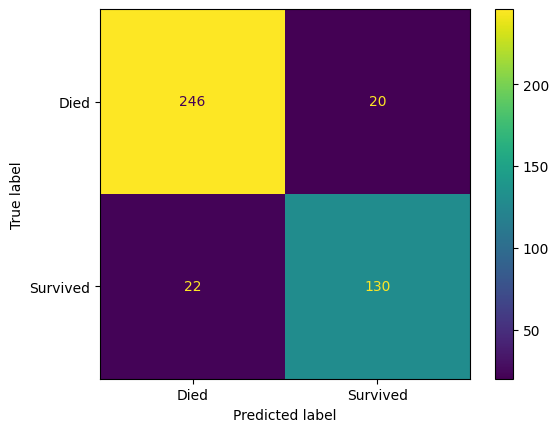

In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV


x_train_xgb = train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_xgb= train_data["Survived"]

x_test_xgb= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_xgb= gender_submission["Survived"]




# XGBoost with default parameters
model_xgb = xgb.XGBClassifier(use_label_encoder=False)
xgb_scores = cross_val_score(model_xgb, x_train_xgb.values, y_train_xgb.values, cv=5, scoring='accuracy')
print(xgb_scores)


param_grid = {
    'max_depth': [3, 6, 9, 12],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [10, 50, 100, 200, 300],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'colsample_bylevel': [0.5, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [1, 2, 3, 4],
    'scale_pos_weight': [1, 2, 3],
    'max_delta_step': [0, 1, 2, 3, 4],
    'base_score': [0.5, 0.6, 0.7, 0.8, 0.9],
    'random_state': [0, 1, 2, 3]
}

rand_search_xgb = RandomizedSearchCV(model_xgb, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
rand_search_xgb.fit(x_train_xgb, y_train_xgb)
test_score_xgb = rand_search_xgb.best_estimator_.score(x_train_xgb, y_train_xgb)

print("Best hyperparameters found:")
for key, value in rand_search_xgb.best_params_.items():
    print(f"{key}: {value}")

print(f"Best accuracy: {rand_search_xgb.best_score_}")


y_true, y_pred_xgb = y_test_xgb, rand_search_xgb.predict(x_test_xgb)
print(classification_report(y_true, y_pred_xgb))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_xgb,display_labels=["Died","Survived"])
print()


# K Nearest Neighbor

[0.83240223 0.83146067 0.80337079 0.79213483 0.85393258]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       266
           1       0.94      0.91      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418




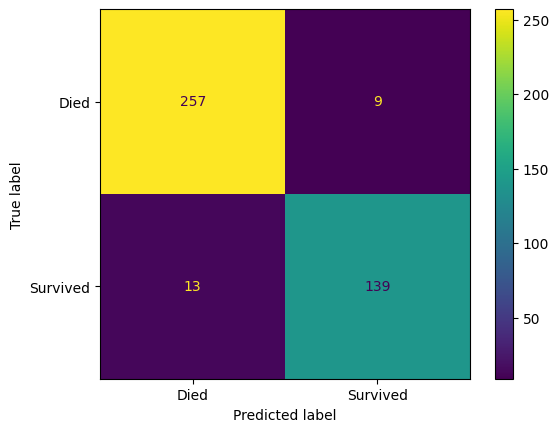

In [22]:
# KNN Code
from sklearn.neighbors import KNeighborsClassifier



x_train_knn = train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_knn= train_data["Survived"]

x_test_knn= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_knn= gender_submission["Survived"]

scale=StandardScaler()

x_train_knn_sc=scale.fit_transform(x_train_knn)
x_test_knn_sc=scale.transform(x_test_knn)

model_knn = KNeighborsClassifier(algorithm="ball_tree",leaf_size=3,metric="manhattan",n_neighbors=20,p=1
                                ,weights="uniform")
result_knn=model_knn.fit(x_train_knn_sc,y_train_knn)

knn_scores = cross_val_score(model_knn, x_train_knn_sc, y_train_knn, cv=5, scoring='accuracy')
print(knn_scores)




# Expanded parameter grid for GridSearchCV
"""param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(1, 50)),
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
}"""

"""grid_search_knn = RandomizedSearchCV(model_knn, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_knn.fit(x_train_knn_sc, y_train)
test_score_knn = grid_search_knn.best_estimator_.score(x_train_knn_sc, y_train)"""

"""print("Best hyperparameters found:")
for key, value in grid_search_knn.best_params_.items():
    print(f"{key}: {value}")"""

"""print(f"Best accuracy: {grid_search_knn.best_score_}")"""

y_true, y_pred_knn = y_test_gb, result_knn.predict(x_test_knn_sc)
print(classification_report(y_true, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_knn,display_labels=["Died","Survived"])
print()


# ANN

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

[0.82681564 0.80337079 0.8258427  0.80898876 0.85955056]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       266
           1       0.92      0.89      0.90       152

    accuracy                           0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418




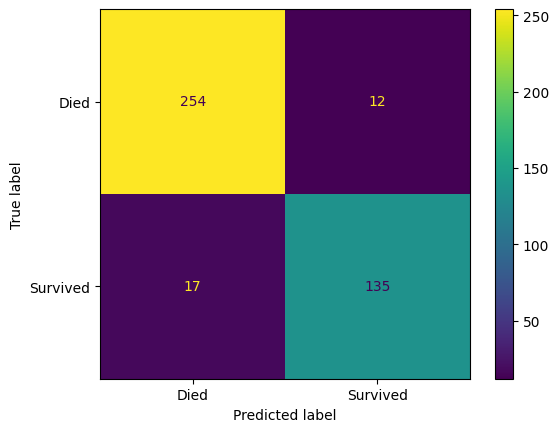

In [23]:
# ANN Code
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV,RandomizedSearchCV



x_train_ANN = train_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_train_ANN= train_data["Survived"]

x_test_ANN= test_data[["Pclass","imp_age","sex_enc","SibSp","Parch"]]
y_test_ANN= gender_submission["Survived"]

scale=StandardScaler()

x_train_ANN_sc=scale.fit_transform(x_train_ANN)
x_test_ANN_sc=scale.transform(x_test_ANN)



# MLP with default parameters
model_mlp = MLPClassifier(random_state=42,activation="tanh",alpha=0.01,hidden_layer_sizes=(50,),learning_rate="constant",
                          max_iter=500,
                         solver="adam")
result_mlp=model_mlp.fit(x_train_ANN_sc,y_train_ANN)
mlp_scores = cross_val_score(model_mlp, x_train_ANN_sc, y_train_ANN, cv=5, scoring='accuracy')
print(mlp_scores)

"""
# Parameter grid for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (10, 10), (20, 20), (50, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500, 1000],
}

grid_search_mlp = GridSearchCV(mlp_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search_mlp.fit(knn_X_train, y_train)
test_score_mlp = grid_search_mlp.best_estimator_.score(knn_X_train, y_train)

print("Best hyperparameters found:")
for key, value in grid_search_mlp.best_params_.items():
    print(f"{key}: {value}")

print(f"Best accuracy: {grid_search_mlp.best_score_}")
"""


y_true, y_pred_ann = y_test_gb, result_mlp.predict(x_test_ANN_sc)
print(classification_report(y_true, y_pred_ann))
ConfusionMatrixDisplay.from_predictions(y_true,y_pred_ann,display_labels=["Died","Survived"])
print()

# Comparing The Accuracies of different models 

In [24]:
from sklearn.metrics import accuracy_score


# Naive Bayes

y_pred_nb = nb_model.predict(x_test_nb)
acc_nb = accuracy_score(y_test_nb, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb}")


# Logistic Regression

y_pred_log= grid_search_log.predict(x_test_log_scaled)
acc_log = accuracy_score(y_test_log, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log}")


# SVM 

y_pred_svm =  grid_search_svm.predict(x_test_svm_scale)
acc_svm = accuracy_score(y_test_svm, y_pred_svm)
print(f"SVM Classification Accuracy: {acc_svm}")



# Decision Tree

y_pred_dt = result_dt.predict(x_test_dt)
acc_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt}")


# Random Forest

y_pred_rf = result_rf.predict(x_test_rf)
acc_rf = accuracy_score(y_test_rf, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf}")


# Gradient Bossting 

y_pred_gb =  result_gb.predict(x_test_gb)
acc_gb = accuracy_score(y_test_gb, y_pred_gb)
print(f"Gradient Boosted Classifier Accuracy: {acc_gb}")


#XGBOOST

y_pred_xgb =  rand_search_xgb.predict(x_test_xgb)
acc_xgb = accuracy_score(y_test_gb, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb}")



#KNN

y_pred_knn = result_knn.predict(x_test_knn_sc)
acc_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Accuracy: {acc_knn}")


# ANN

y_pred_ANN = result_mlp.predict(x_test_ANN_sc)
acc_ann = accuracy_score(y_test_ANN, y_pred_ANN)
print(f"ANN Accuracy: {acc_ann}")


acc_list=[acc_nb,acc_log,acc_svm,acc_dt,acc_rf,acc_gb,acc_xgb,acc_knn,acc_ann]
acc_list=sorted(acc_list,reverse=True)
acc_list

Naive Bayes Accuracy: 0.9043062200956937
Logistic Regression Accuracy: 0.9473684210526315
SVM Classification Accuracy: 0.9593301435406698
Decision Tree Accuracy: 0.9019138755980861
Random Forest Accuracy: 1.0
Gradient Boosted Classifier Accuracy: 0.8851674641148325
XGBoost Accuracy: 0.8995215311004785
KNN Accuracy: 0.9473684210526315
ANN Accuracy: 0.930622009569378


[1.0,
 0.9593301435406698,
 0.9473684210526315,
 0.9473684210526315,
 0.930622009569378,
 0.9043062200956937,
 0.9019138755980861,
 0.8995215311004785,
 0.8851674641148325]

In [25]:
print(f"the best accuracy is Random Forest with the accuracy of {acc_list[0]}")

the best accuracy is Random Forest with the accuracy of 1.0


In [26]:
import csv

y_pred_rf = result_rf.predict(x_test_rf)
data={"Passenger_ID":test_data.PassengerId,"Survived":y_pred_rf}
out_put=pd.DataFrame(data)
out_put.to_csv("submission",index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!
